In [1]:
#Taken from https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d

import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [2]:
import matplotlib.pyplot as plt
image_index = 23423
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')

9


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

In [5]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(28, kernel_size=(2,2), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Using TensorFlow backend.
W1115 17:01:41.480999  9992 deprecation_wrapper.py:119] From C:\Users\Owner\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [6]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

W1115 17:01:43.154855  9992 deprecation_wrapper.py:119] From C:\Users\Owner\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Epoch 1/10
60000/60000 [==============================] - 28s 470us/step - loss: 0.1795 - accuracy: 0.9451
Epoch 2/10
60000/60000 [==============================] - 28s 470us/step - loss: 0.0615 - accuracy: 0.9806
Epoch 3/10
60000/60000 [==============================] - 28s 469us/step - loss: 0.0442 - accuracy: 0.9862
Epoch 4/10
60000/60000 [==============================] - 28s 468us/step - loss: 0.0342 - accuracy: 0.9893
Epoch 5/10
60000/60000 [==============================] - 29s 478us/step - loss: 0.0287 - accuracy: 0.9908
Epoch 6/10
60000/60000 [==============================] - 29s 476us/step - loss: 0.0248 - accuracy: 0.9919
Epoch 7/10
60000/60000 [==============================] - 29s 476us/step - loss: 0.0221 - accuracy: 0.9927
Epoch 8/10
60000/60000 [==============================] - 30s 501us/step - loss: 0.0194 - accuracy: 0.9937
Epoch 9/10
60000/60000 [==============================] - 31s 513us/step - loss: 0.0182 - accuracy: 0.9940
Epoch 10/10
60000/60000 [============

In [14]:
[loss, accuracy] = model.evaluate(x_test, y_test)
accuracy

10000/10000 [==============================] - 2s 177us/step


0.984000027179718

3


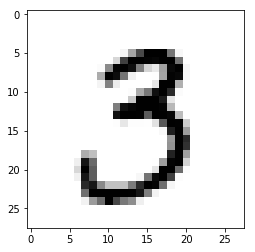

In [21]:
image_index = 90
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

7


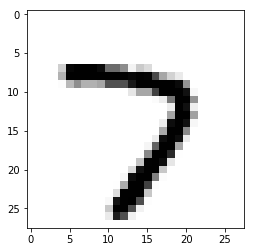

In [22]:
image_index = 17
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())